In [47]:
import datajoint as dj
# from u19_pipeline import lab, reference, subject, action, task, acquisition, behavior

In [4]:
lab = dj.create_virtual_module('lab', 'u19_lab')
reference = dj.create_virtual_module('reference', 'u19_reference')
subject = dj.create_virtual_module('subject', 'u19_subject')
action = dj.create_virtual_module('action', 'u19_action')
task = dj.create_virtual_module('task', 'u19_task')
acquisition = dj.create_virtual_module('acquisition', 'u19_acquisition')
behavior = dj.create_virtual_module('behavior', 'u19_behavior')

/usr/local/lib/python3.6/dist-packages/datajoint/connection.py:218: UserWarning: MySQL server has gone away. Reconnecting to the server.
  warnings.warn("MySQL server has gone away. Reconnecting to the server.")


In [5]:
f = dj.Diagram(lab)

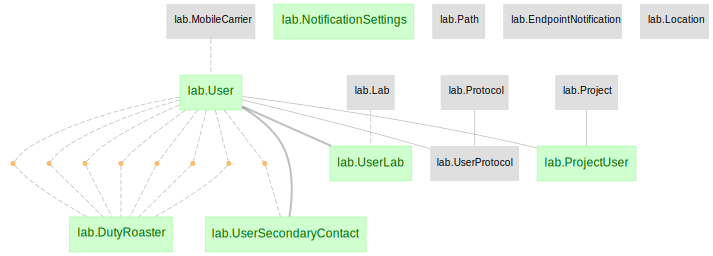

In [6]:
f

In [7]:
f.save('/images/lab_erd.png')

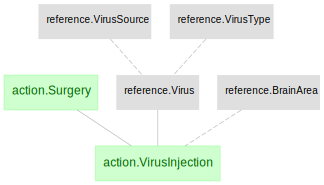

In [7]:
f = dj.Diagram(reference.Virus)+1-1
f

In [8]:
f.save('/images/reference_erd.png')

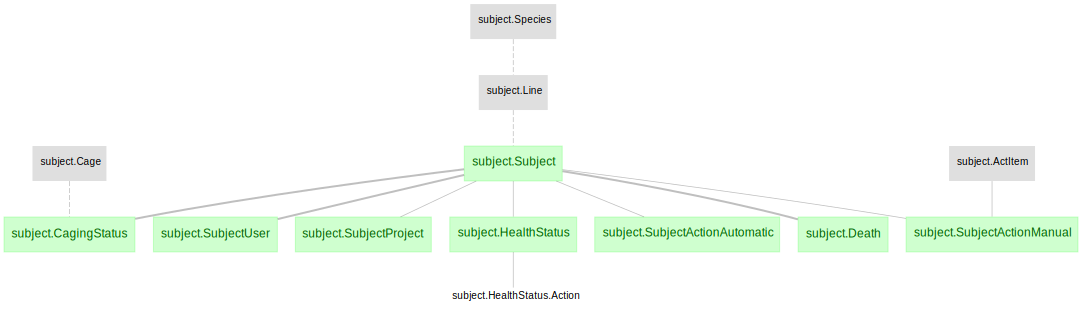

In [8]:
f = dj.Diagram(subject) - subject.Source - subject.Allele - \
    subject.SequenceType - subject.Sequence - subject.AlleleSequence - \
    subject.LineAllele - subject.GenotypeTest - subject.Zygosity - \
    subject.BreedingPair - subject.Litter - subject.Strain - subject.LitterSubject - subject.Weaning
f

In [9]:
f.save('/images/subject_erd.png')

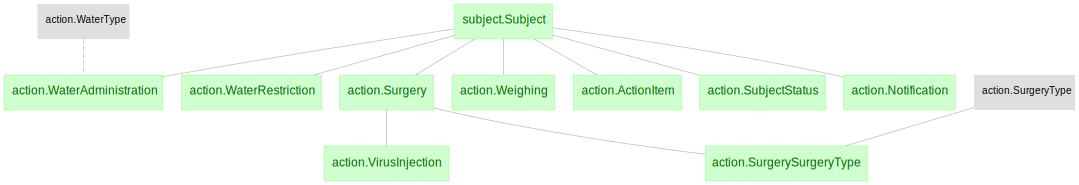

In [15]:
f = dj.Diagram(action) + subject.Subject
f

In [16]:
f.save('/images/action_erd.png')

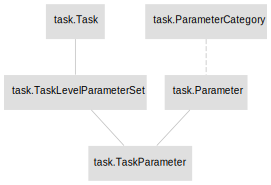

In [17]:
f = dj.Diagram(task)
f

In [18]:
f.save('/images/task_erd.png')

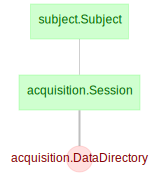

In [24]:
f = dj.Diagram(acquisition) + subject.Subject
f

In [25]:
f.save('/images/acquisition_erd.png')

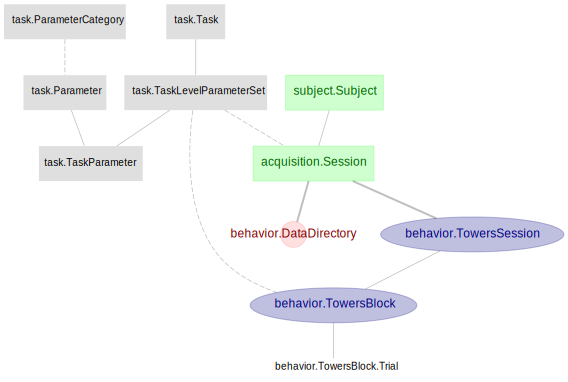

In [17]:
f = dj.Diagram(behavior) + dj.Diagram(task) + subject.Subject + dj.Diagram(acquisition)
f

In [26]:
f.save('/images/behavior_erd.png')

In [19]:
meso = dj.create_virtual_module('meso', 'u19_meso')

In [26]:
f = dj.Diagram(meso.ScanInfo) + meso.FieldOfView + meso.FieldOfView.File + subject.Subject + acquisition.Session

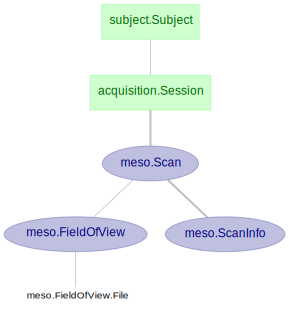

In [27]:
f

In [24]:
f.save('/images/meso_erd.png')

In [ ]:
f = dj.Diagram(meso.ScanInfo) + meso.FieldOfView + meso.FieldOfView.File + subject.Subject + acquisition.Session

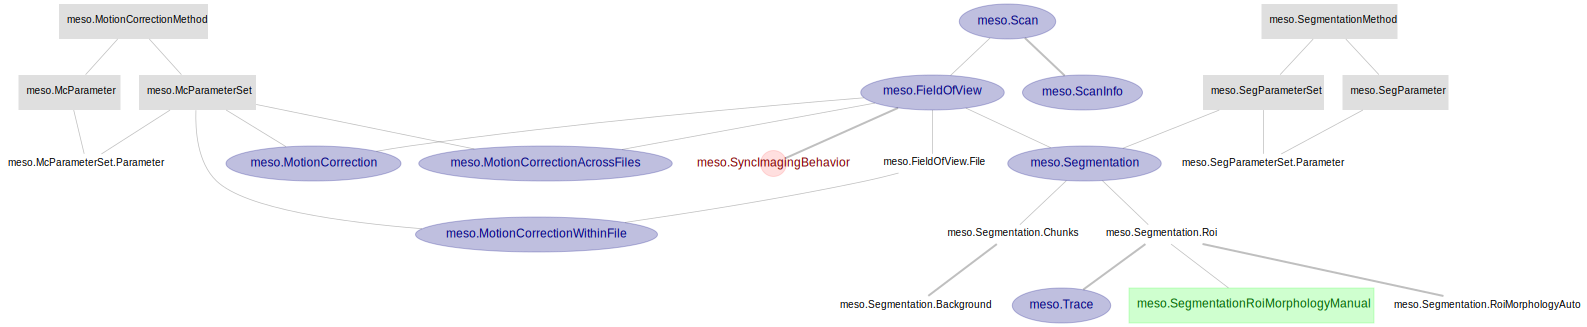

In [28]:
dj.Diagram(meso)

/usr/local/lib/python3.6/dist-packages/datajoint/connection.py:218: UserWarning: MySQL server has gone away. Reconnecting to the server.
  warnings.warn("MySQL server has gone away. Reconnecting to the server.")


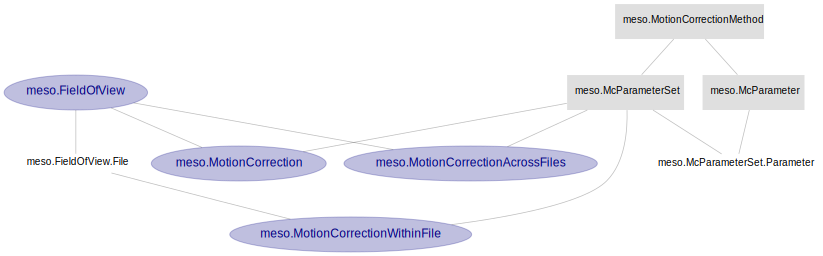

In [37]:
f = dj.Di(meso.MotionCorrectionMethod) + 2 + meso.FieldOfView + meso.FieldOfView.File
f

In [39]:
f.save('/images/meso_motion_correction.svg')

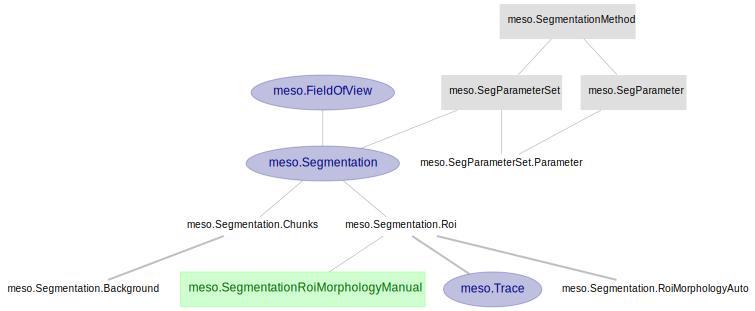

In [36]:
dj.Di(meso.FieldOfView) + (dj.Di(meso.SegmentationMethod) + 5)

In [41]:
len(subject.Subject())

/usr/local/lib/python3.6/dist-packages/datajoint/connection.py:218: UserWarning: MySQL server has gone away. Reconnecting to the server.
  warnings.warn("MySQL server has gone away. Reconnecting to the server.")


211

In [42]:
len(acquisition.Session())

/usr/local/lib/python3.6/dist-packages/datajoint/connection.py:218: UserWarning: MySQL server has gone away. Reconnecting to the server.
  warnings.warn("MySQL server has gone away. Reconnecting to the server.")


10173

In [45]:
ntrials = 0
for key in acquisition.Session.fetch('KEY'):
    
    ntrials += len(behavior.TowersBlock.Trial() & key)

In [46]:
ntrials

1734769

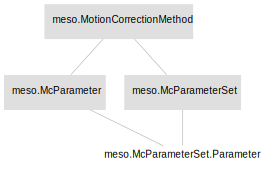

In [50]:
dj.Di(meso.MotionCorrectionMethod) + meso.McParameter + meso.McParameterSet + meso.McParameterSet.Parameter

In [53]:
meso.McParameterSet.Parameter().fetch1()

{'mcorr_method': 'LinearNormalized',
 'mc_parameter_set_id': 1,
 'mc_parameter_name': 'LinearNormalizedParams',
 'mc_max_shift': array([[15.]]),
 'mc_max_iter': array([[5.]]),
 'mc_stop_below_shift': 0.3,
 'mc_black_tolerance': -1.0,
 'mc_median_rebin': 10.0}

In [4]:
import datajoint as dj
dj.config['database.host'] = 'host.docker.internal'
dj.config['database.user'] = 'shan'
dj.config['database.password'] = 'shan'
dj.conn()

Connecting shan@host.docker.internal:3306


DataJoint connection (connected) shan@host.docker.internal:3306

In [5]:
meso = dj.create_virtual_module('meso', 'u19_meso')

In [11]:
 meso.McParameterSet.Parameter()

mcorr_method,mc_parameter_set_id,mc_parameter_name,mc_parameter_value
LinearNormalized,1,mc_black_tolerance,=BLOB=
LinearNormalized,1,mc_max_iter,=BLOB=
LinearNormalized,1,mc_max_shift,=BLOB=
LinearNormalized,1,mc_median_rebin,=BLOB=
LinearNormalized,1,mc_stop_below_shift,=BLOB=
